In [1]:
import pandas as pd

from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = 'D:/data/ventilator-pressure-prediction/'

train_data = pd.read_csv(DATA_PATH+'train.csv',index_col=0)
test_data  = pd.read_csv(DATA_PATH+'test.csv', index_col=0)
sample     = pd.read_csv(DATA_PATH+'sample_submission.csv')

C:\Users\codef\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
train_data

,breath_id,R,C,time_step,u_in,u_out,pressure
id,,,,,,,
1,1,20,50,0.000000,0.083334,0,5.837492
2,1,20,50,0.033652,18.383041,0,5.907794
3,1,20,50,0.067514,22.509278,0,7.876254
4,1,20,50,0.101542,22.808822,0,11.742872
5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...
6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035998,125749,50,10,2.571408,1.558978,1,3.798729


In [6]:
lengths = train_data.groupby("breath_id")["time_step"].max()
lengths

breath_id
1         2.689766
2         2.690624
3         2.525398
4         2.528579
5         2.724876
            ...   
125740    2.721422
125742    2.665376
125743    2.666352
125745    2.508653
125749    2.638017
Name: time_step, Length: 75450, dtype: float64

In [7]:
lengths.min(), lengths.max()

(2.4968085289001465, 2.9372379779815674)

In [8]:
def plot_hist(x, ylim, title, bins=5000):

    fig, ax = plt.subplots(1,1,figsize=(30,3))

    plt.hist(x, density=True, bins=bins)
    plt.ylabel('density')
    plt.xlabel(title)
    plt.ylim(ylim)

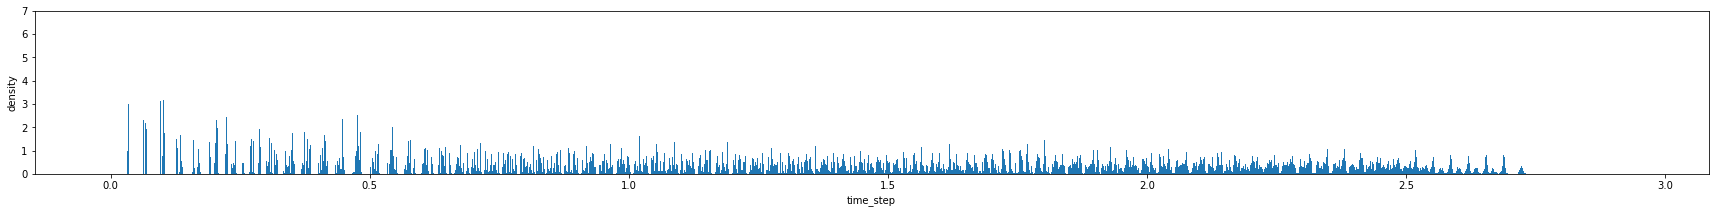

In [9]:
plot_hist(train_data.time_step, (0,7), 'time_step')

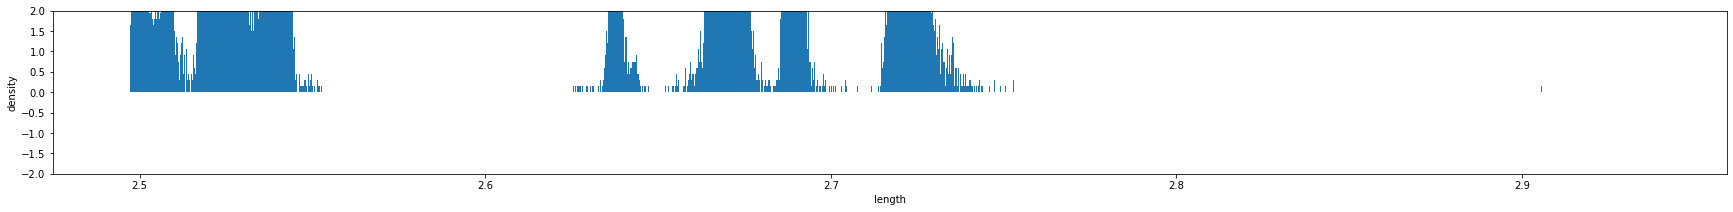

In [10]:
plot_hist(train_data.groupby("breath_id")["time_step"].max().values, (-2,2), 'length')

In [11]:
from data import VantilatorDataModule
from training import eval_models

C:\Users\codef\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
100%|██████████| 81/81 [00:11<00:00,  7.29it/s]


series_input shape: (75450, 2, 80)
series_target shape: (75450, 80)
features shape: (75450, 2)


In [12]:
data = VantilatorDataModule()

100%|██████████| 81/81 [00:11<00:00,  7.28it/s]


series_input shape: (75450, 2, 80)
series_target shape: (75450, 80)
features shape: (75450, 2)


In [13]:
output = eval_models(data)

model: 0


100%|██████████| 5/5 [00:01<00:00,  4.85it/s]


In [14]:
output.shape, data.series_target.shape

((75450, 80), (75450, 80))

In [34]:
def plot_preassure(idx, ylim, title):

    fig, ax = plt.subplots(1,1,figsize=(20,5))

    #print(p)
    #print(list(range(80)))

    ax.plot(list(range(80)), data.series_input[idx,0], color='g')
    ax.plot(list(range(80)), data.series_target[idx], color='b')
    ax.plot(list(range(80)), output[idx], color='r')
    plt.ylabel('preassure')
    plt.xlabel('time')
    #plt.ylim(ylim)

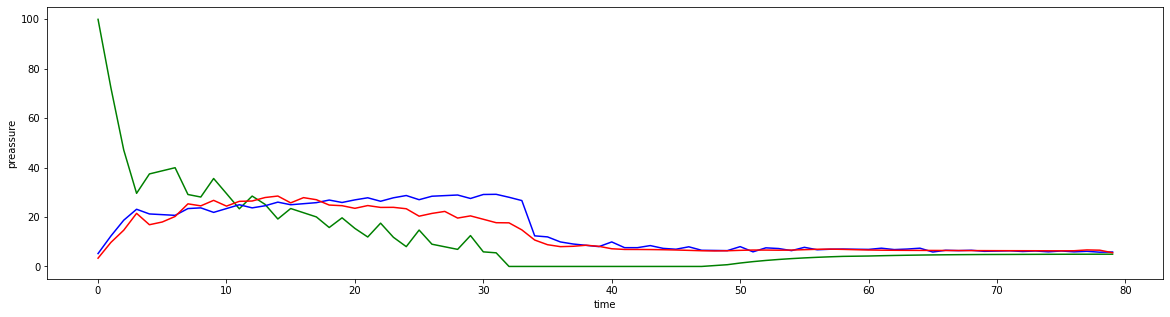

In [39]:
plot_preassure(40000, (-2,2), 'title')